In [22]:
# Import libraries

import pandas as pd
import numpy as np
from IPython.display import IFrame

import matplotlib.pyplot as plt

import altair as alt
from vega_datasets import data
mtcars = data.cars()

# Poll question links
q1 = 'https://app.sli.do/event/0nwvmaj5/embed/polls/5cff1bff-b850-4647-b2fd-c799dbd16b78'
q2 = 'https://app.sli.do/event/0nwvmaj5/embed/polls/e3282762-367b-40c7-a9cc-c76f9f8db849'

## Set Altair default size

def theme_fm(*args, **kwargs):
    return {'height': 220,
            'width' : 220,
            'config': {'style': {'circle': {'size': 400},
                                'point': {'size': 30},
                                'square': {'size': 400},
                                },
                       'legend': {'symbolSize': 20, 'titleFontSize': 20, 'labelFontSize': 20}, 
                       'axis': {'titleFontSize': 20, 'labelFontSize': 20}},
            }

alt.themes.register('theme_fm', theme_fm)
alt.themes.enable('theme_fm')

print('You are ready to proceed!')

You are ready to proceed!


## Learning Context

<center>
<img src="imgs/image.jpg" width=50%>
</center>

## Learning Context: Visualization I


- **Academic year**: Block 2 of MDS-V
    - Block 1: Platforms, Programming, Wrangling
    - ~ 120 students in the class

- **Programming**: Varied
     - Least experienced: 1-2 months in python and R 
     - Most experienced:  Worked in software industry for 2+ years 

- **Prior knowledge**: Most have strong preferences
    - Python: Matplotlib and/or Seaborn
    - R: baseR and/or ggplot


- **Motivation**: 
    - Most would rather be learning more about machine learning and neural networks 😅

# Altair: Declarative Visualization in Python

<div align = "right"> 
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    March 13, 2020 <br>
    Firas Moosvi
</div>

In [23]:
## We'll be using the mtcars dataset for most of the cool stuff in this lecture

mtcars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


## Learning Objectives

- Explain the difference between declarative and imperative syntax

- Describe the 6 components of the visualization grammar

- Construct data visualizations using Altair

- Add interactivity to Altair plots

- Start critically evaluate data visualizations

### Starting with the punchline!

By the end of lecture today, you will learn how to make this chart using the `mtcars` dataset:

In [24]:
base = alt.Chart(mtcars).mark_point().encode(
    alt.X('Horsepower'),
    alt.Y('Miles_per_Gallon'),
    alt.Color('Origin'),
    alt.Column('Origin')
) 

base.interactive()

alt.Chart(...)

### In matplotlib:

If you're familiar with `matplotlib`, this should illustrate to you **how** Altair is different - not better or worse, just *differently sane* (h/t [Greg Wilson](https://tidynomicon.tech)).

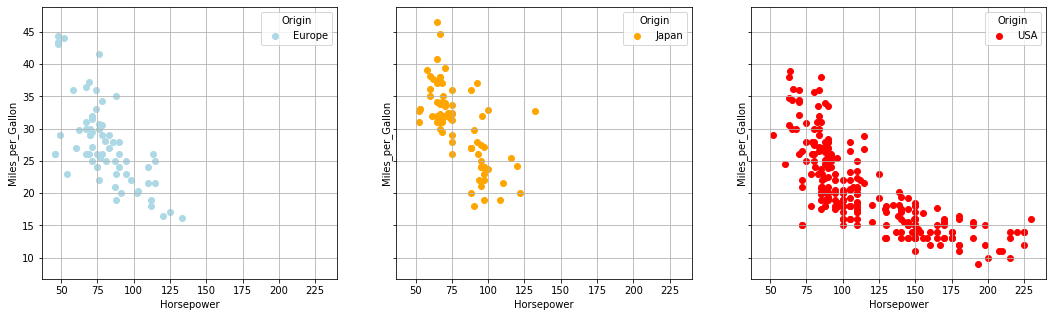

In [23]:
colour_map = dict(zip(mtcars['Origin'].unique(), ['red','lightblue','orange']))
n_panels = len(colour_map)

fig, ax = plt.subplots(1, n_panels, figsize=(n_panels * 6, 5),
                       sharex = True, sharey = True)

for i, (country,group) in enumerate(mtcars.groupby('Origin')):
    ax[i].scatter(group['Horsepower'],
                  group['Miles_per_Gallon'],
                  label = country,
                  color = colour_map[country])
    ax[i].legend(title='Origin')
    ax[i].grid()
    ax[i].set_xlabel('Horsepower')
    ax[i].set_ylabel('Miles_per_Gallon')

## Part 1: Power of data visualizations

#### Case 1: Gun deaths in Florida

<div style="height: 30px;">
    
</div>

<center>
    <img src="https://i.insider.com/53038b556da8110e5ce82be7?width=700&format=jpeg&auto=webp" width=70%>
</center>
    
Sources: [Original plot](https://www.businessinsider.com/gun-deaths-in-florida-increased-with-stand-your-ground-2014-2), [Example](https://callingbull.org/tools/tools_misleading_axes.html), and [Data](https://docs.google.com/spreadsheets/d/1-kFDDxN7_APdaUwZpUdqN4O6Oh1vKVJreGqopyXyboI/edit#gid=695259917)

In [25]:
## Poll question 1

IFrame(q1, 500, 400)

## Results!

The correct answer is: 

```
## Enter the answer here
```

Here is the proper way to visualize the plot above:

![](imgs/case1_proper.jpeg)

### Case 2: Clinic visits for neck injuries and TV-watching habits

<div style="height: 30px;">
    
</div>
    
<center>
<img src=imgs/case2.png width=100% align="center"/>
</center>

Sources: Adapted from [callingbull.org](https://youtu.be/9pNWVMxaFuM?t=287) and [Original Paper](https://www.ncbi.nlm.nih.gov/pubmed/26103708)

In [6]:
## Poll question 2

IFrame(q2, 500, 500)

## Results!

The correct answer is: 

```
## Enter the answer here
```

Here is the actual plot with the real situation:

![](imgs/case2_actual.png)

and the "improved" version.


Though I still would NOT put a secondary axis on this plot that's scaled differently from the other.


![](imgs/case2_proper.png)


## Part 2: Introduction to Altair


<center>
    <img src="imgs/Visualization-Grammar 1.jpeg">
<center>
    
Slide used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

### Why do we need a visualization grammar?

In [26]:
# Altair: Declarative

base = alt.Chart(mtcars).mark_point().encode(
    alt.X('Horsepower'),
    alt.Y('Miles_per_Gallon'),
    alt.Color('Origin'),
    alt.Column('Origin')
)

base

alt.Chart(...)

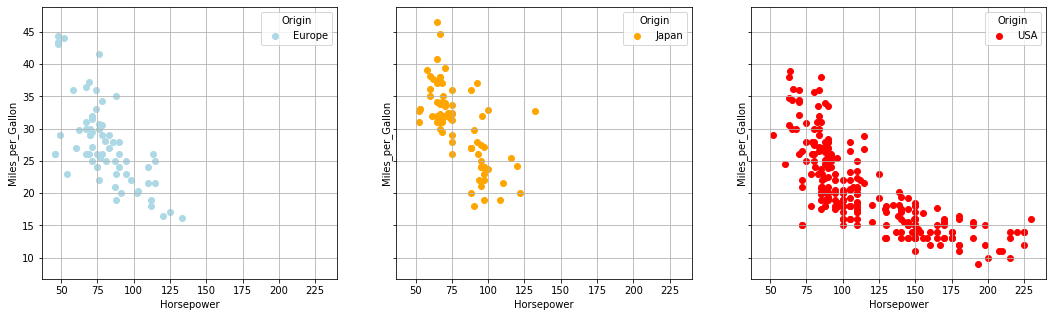

In [8]:
# Matplotlib: Imperative

colour_map = dict(zip(mtcars['Origin'].unique(), ['red','lightblue','orange']))
n_panels = len(colour_map)

fig, ax = plt.subplots(1, n_panels, figsize=(n_panels * 6, 5),
                       sharex = True, sharey = True)

for i, (country,group) in enumerate(mtcars.groupby('Origin')):
    ax[i].scatter(group['Horsepower'],
                  group['Miles_per_Gallon'],
                  label = country,
                  color = colour_map[country])
    ax[i].legend(title='Origin')
    ax[i].grid()
    ax[i].set_xlabel('Horsepower')
    ax[i].set_ylabel('Miles_per_Gallon')

<center>
    <img src="imgs/Visualization-Grammar 8.jpeg">
</center>

Slide used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

<center>
    <img src="imgs/Visualization-Grammar 2.jpeg">
<center>
    
Slide used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

## 1. Tabular Data

Data in Altair is built around the [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

The fundamental object in Altair is the ``Chart``. It takes the dataframe as a single argument:

```chart = alt.Chart(DataFrame)```

Let's create a simple `DataFrame` to visualize, with a categorical data in the `Letters` column and numerical data in the `Numbers` column:

In [9]:
df = pd.DataFrame({'Letters': list('CCCDDDEEE'),
                     'Numbers': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
df.T

,0,1,2,3,4,5,6,7,8
Letters,C,C,C,D,D,D,E,E,E
Numbers,2,7,4,1,2,6,8,4,7


In [10]:
plot = alt.Chart(df)

#plot 

<center>
    <img src="imgs/Visualization-Grammar 3.jpeg">
<center>
    
Slide used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

## 2. Chart Marks

Next we can decide what sort of *mark* we would like to use to represent our data.

Here are some of the more commonly used `mark_*()` methods supported in Altair and Vega-Lite; for more detail see [Marks](https://altair-viz.github.io/user_guide/marks.html) in the Altair documentation:

|Mark|
|------|
|`mark_area()`|
|`mark_bar()`|
|`mark_circle()`, `mark_point`, `mark_square`|
|`mark_rect()`|
|`mark_line()`|
|`mark_rule()`|
|`mark_text()`|
|`mark_image()`|

Let's add a mark_point() to our plot:

In [11]:
plot = alt.Chart(df).mark_point()

plot

alt.Chart(...)

😒 

We have a plot now, but clearly we're being pranked: all the data points collapsed to one location! Why ?

<center>
    <img src="imgs/Visualization-Grammar 4.jpeg">
<center>
    
Slide used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

A visual encoding specifies how a given data column should be **mapped** onto *visual properties* of the visualization.

Some of the more frequently used visual encodings are listed on the right:






For a complete list of these encodings, see the [Encodings](https://altair-viz.github.io/user_guide/encoding.html) section of the documentation.

|Encoding| What does it encode?
|--------|--------------------|
|`X`| x-axis value | 
|`Y`| y-axis value |
|`Color`| color of the mark |
|`Opacity`| transparency/opacity of the mark |
|`Shape`| shape of the mark |
|`Size`| size of the mark |
|`Row`| row within a grid of facet plots |
|`Column`| column within a grid of facet plots |

Let's add an encoding so the data is mapped to the x and y axes:

In [12]:
plot = alt.Chart(df).mark_point().encode(alt.X('Numbers'))

plot

# We still haven't encoded any of the data to the Y-axis!

alt.Chart(...)

### You Try!

Encode the `Letters` column at the `y` position to make the visualization more useful.

In [13]:
plot = alt.Chart(df).mark_point().encode(alt.X('Numbers'),
                                         alt.Y('Letters'),
                                         )
# first chart
plot.encode(alt.Y('Col1'))

plot.encode(alt.Y('Col2'))
plot

alt.Chart(...)

### You Try!

Change the `mark` from `mark_point()` to `mark_circle` or `mark_square`

In [14]:
plot = plot ## YOUR SOLUTION HERE

plot.mark_circle()

alt.Chart(...)

### You Try!

What do you think will happen when you try to change the `mark_circle` to a `mark_bar()`

In [15]:
plot.mark_bar() ## YOUR SOLUTION HERE

alt.Chart(...)

<center>
    <img src="imgs/Visualization-Grammar 5.jpeg">
<center>
    
Slide used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

### 4. Transforms

Though Altair supports a few built-in data transformations and aggregations, in general I **do not suggest** you use them.

Some reasons why:

- Not all functions are available
- You already know how to do complex wrangling using pandas
- No opportunity to write tests if wrangling is done within plots
- Single point of failure
- Syntax is non-trivial and not very "pythonic"
- Code is less readable and harder to document

<center>
    <img src="imgs/Visualization-Grammar 6.jpeg">
<center>
    
Slide used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

### 5. Scale

The scale parameter controls axis limits, axis types (`log`, `semi-log`, etc...).

For a complete description of the available options, see the [Scales and Guides](https://altair-viz.github.io/user_guide/scale_resolve.html) section of the documentation.

In [16]:
plot = alt.Chart(df).mark_point().encode(
            alt.X('Numbers'),
            alt.Y('Letters'))

plot.encode(alt.X('Numbers', 
                  scale = alt.Scale(type='log')))

alt.Chart(...)

<center>
    <img src="imgs/Visualization-Grammar 7.jpeg">
<center>
    
Slide used with permission from [Eitan Lees](https://eitanlees.github.io/altair-stack/)

### 6. Guide

The guides component deals with legends and annotations that "guide" our interpretation of the data. In most cases you will not need to work with this component very much as the defaults are pretty good!

For a complete description of the available options, see the [Scales and Guides](https://altair-viz.github.io/user_guide/scale_resolve.html) section of the documentation.

## Apply the Visualization Grammar!

### Activity: 

Use the table below to create the visualization we started the lecture with (try not to scroll up to get the code unless you're really stuck!)

| Grammar component | Plot element | 
| ----------------- | ------------ |
| 1. Data |     `mtcars` |
| 2. Mark |     `mark_point` |
| 3. Encode |   'Horsepower' to X,<br> 'Miles_per_Gallon' to Y, <br> 'Origin' to Color AND Column |
| 4. Transform | None |
| 5. Scale |    None |
| 6. Guide |    None |



In [17]:
# Altair 

## To uncomment the code chunk below, select it
## and press Command + / (or Control + /)

first_chart = alt.Chart(mtcars).mark_point().encode(
    alt.X('Horsepower'),
    alt.Y('Miles_per_Gallon'),
    alt.Color('Origin'),
    alt.Row('Origin')
)
first_chart.interactive()

alt.Chart(...)

### One more thing...

In [18]:
chart = alt.Chart(mtcars).mark_point().encode(
            alt.Y('Horsepower'),
            alt.X('Miles_per_Gallon')).interactive()

# & and | 

chart & chart | chart.mark_circle(size=30) | chart & chart.mark_bar()

alt.HConcatChart(...)

## Summary and recap:

### 1. Power of visualizations

- Visualizations can be very effective in communicating complex ideas...
- But they can also be abused
- Responsible use of visualizations

### 2. Visualization Grammar

1. Data
2. Marks
3. Encoding
4. Transformation
5. Scale
6. Guide

### 3. Introduction to Altair syntax

- Marks and encoding
- Declarative vs. Imperative
- Built-in interactivity

## Next class ... 

In [19]:
# starting with the same plot we started with this lecture...

base = (
    alt.Chart(mtcars).mark_point(size=40).encode(
        alt.X("Horsepower"),
        alt.Y("Miles_per_Gallon"),
        alt.Color("Origin"),
        alt.Column("Origin"),
    )
    .properties(width=250, height=200)
)

base

# With just a few lines of code, we can make some magic...

alt.Chart(...)

In [20]:
## New code - to be discussed next week!

brush = alt.selection(type="interval")

base = base.encode(
    color=alt.condition(brush, "Origin", alt.ColorValue("gray")),
    tooltip=["Name", "Origin", "Horsepower", "Miles_per_Gallon"],
).add_selection(brush)
base


alt.Chart(...)

### Acknowledgements

- PIMS for hosting and maintaining `syzygy`
- Altair development team
    - [Eitan Lees for his slides on the Visualization Grammar](https://speakerdeck.com/eitanlees/visualization-grammar)
    - [Jake VanderPlas](https://github.com/jakevdp) for his thousands of StackOverflow and GitHub answers related to Altair)
- MDS-V academic teaching team for their ideas and feedback


## Appendix

![](imgs/02-altair-stack.png)

[Credit: Eitan Lees](https://eitanlees.github.io/altair-stack/)

Contrary to other plotting libraries, in Altair, every dataset must be provided as either:

- a Dataframe, OR 
- a URL to a `json` or `csv` file
- GeoJSON objects (for maps)

The URL passed in, is turned into a dataframe behind the scenes. 

See [Defining Data](https://altair-viz.github.io/user_guide/data.html) in the Altair documentation for more details.

Altair is able to automatically determine the type of the variable using built-in heuristics. 

That being said, it is definitely **very GOOD practice** to specify the `encoding` explicitly.

There are four possible data types and Altair provides a useful shortcode to specify them: :

| Data Type | Description | Shortcode| 
| ----------| ----------- | ---------|
| Quantitative | Numerical quantity (real-valued) | `:Q` |
| Nominal | Names / Unordered categoricals | `:N` |
| Ordinal | Ordered categoricals | `:O` | 
| Temporal | Date/time | `:T` | 



## RISE settings 

In [28]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
tmp = cm.update(
        "rise",
        {
            "theme": "serif",
            "transition": "fade",
            "start_slideshow_at": "selected",
            "autolaunch": True,
            "width": "100%",
            "height": "100%",
            "header": "",
            "footer":"",
            "scroll": True,
            "enable_chalkboard": True,
            "slideNumber": True,
            "center": False,
            "controlsLayout": "edges",
            "slideNumber": True,
            "hash": True,
        }
    )